In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
[1,2,3] + [4,5]

[1, 2, 3, 4, 5]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import girth
# from girth import rasch_conditional
from irt.data.rasch import generate_data, generate_data_positive_scores
from irt.algorithms.spectral_estimator import spectral_estimate
from irt.algorithms import conditional_mle
from irt.algorithms import rasch_mml
from irt.algorithms import eigen_vector_method
from irt.evaluation import eval_utils
import torch as th
# import data (you supply this function)
# my_data = import_data(filename)

# # Assume its dichotomous data with True -> 1 and False -> 0
# tagged_data = tag_missing_data(my_data, [0, 1])

ModuleNotFoundError: No module named 'torch'

In [3]:
def relative_betas_error(beta, betah):
    beta_norm = beta - np.min(beta)
    betah_norm = betah - np.min(betah)
    return np.linalg.norm(beta_norm - betah_norm)/np.linalg.norm(beta_norm)

def relative_z_error(z, zh):
    return np.linalg.norm(z - zh)/np.linalg.norm(z)

    

In [23]:


n_array = [200, 500, 750, 1000, 2000, 3000, 5000, 10000]
n_trials = 100
m = 50
p = 0.1

lower_bound_var = []

var_ase = []


for n in n_array:
    thetas = np.random.normal(0, 3, size=(n,))
    betas = np.random.normal(0, 2, size=(m,))    
    
    cramer_rao_bound = eval_utils.cramer_rao_lower_bound(betas, thetas, p)
    est_all = []
    
    var_m = []
    var_mlogm = []
    var_mlogn = []
    var_sqrtm = []
    var_n = []
    var_nlogn = []
    var_nlogm = []
    var_sqrtn = []

    all_vars = [
        var_m,
        var_mlogm,
        # var_mlogn,
        # var_sqrtm,
        # var_n,
        # var_nlogn,
        # var_nlogm,
        # var_sqrtn,
    ]
    
    lambd_m = 1./m
    lambd_mlogm = 1./(m*np.log(m))
    lambd_mlogn = 1./(m*np.log(n))
    lambd_sqrtm = 1./np.sqrt(m)
    lambd_n = 1./n
    lambd_nlogn = 1./(n*np.log(n))
    lambd_nlogm = 1./(n*np.log(m))
    lambd_sqrtn = 1./np.sqrt(n)
    
    for _ in range(n_trials):
        data = generate_data(betas, thetas, p)
        
        for i, lambd in enumerate([lambd_m, lambd_mlogm]): #, lambd_mlogn, lambd_sqrtm, lambd_n, lambd_nlogn, lambd_nlogm, lambd_sqrtn]):
            est_ase = spectral_estimate(data, accelerated=True, return_beta=True, lambd=lambd)
            all_vars[i].append(
                est_ase
                # relative_betas_error(betas, est_ase)
              )
        
    var_ase_n = []
    for i, var in enumerate(all_vars):
        all_vars[i] = np.array(var)
        var_ase_n.append(np.sum(np.var(all_vars[i], 0)))
        # var_ase_n.append(np.mean(all_vars[i]))
    
    print(f"n={n}, lowerbound:{np.sum(cramer_rao_bound)}, variance={var_ase_n}")
        


n=200, lowerbound:26.472283953532504, variance=[37.672454711350625, 69.52075787080669]
n=500, lowerbound:10.929843143096994, variance=[20.985701160794292, 39.87998836120901]
n=750, lowerbound:6.7568540284167655, variance=[17.125186330887146, 30.659312263604033]
n=1000, lowerbound:4.985803646957596, variance=[16.7408054514368, 31.950919551155163]
n=2000, lowerbound:2.648156355347698, variance=[12.409315266323047, 22.071679891700274]
n=3000, lowerbound:1.8506855673129297, variance=[9.846011591318748, 22.25157145428722]
n=5000, lowerbound:1.0769234683950892, variance=[8.297615104307312, 12.349826652465605]
n=10000, lowerbound:0.5060200028642977, variance=[6.280436347357733, 7.446326709258864]


Text(0, 0.5, '$|| \\beta - \\beta^*||/||\\beta^*|| $')

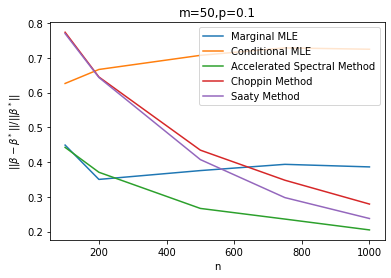

In [8]:
plt.plot(n_array, errors_mmle_arr, label="Marginal MLE")
plt.plot(n_array, errors_cmle_arr, label="Conditional MLE")
plt.plot(n_array, errors_ase_arr, label="Accelerated Spectral Method")
plt.plot(n_array, errors_choppin_arr, label="Choppin Method")
# plt.plot(n_array, errors_garner_arr, label="Garner Method")
plt.plot(n_array, errors_saaty_arr, label="Saaty Method")


plt.legend()
plt.title(rf"m={m},p={p}")
plt.xlabel("n")
plt.ylabel(r'$|| \beta - \beta^*||/||\beta^*|| $')
# plt.title(r'$d = mnp^2$, $p = \sqrt{\log m/n}$')

Text(0, 0.5, 'Time (s)')

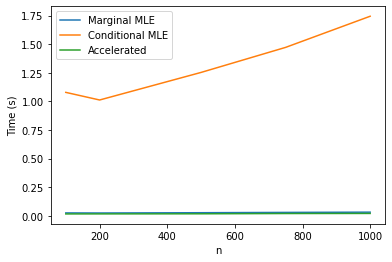

In [9]:
plt.plot(n_array, time_mmle_arr, label="Marginal MLE")
plt.plot(n_array, time_cmle_arr, label="Conditional MLE")
plt.plot(n_array, time_ase_arr, label="Accelerated")

plt.legend()
plt.xlabel("n")
plt.ylabel('Time (s)')